#                                       NETFLIX DATA ANALYSIS

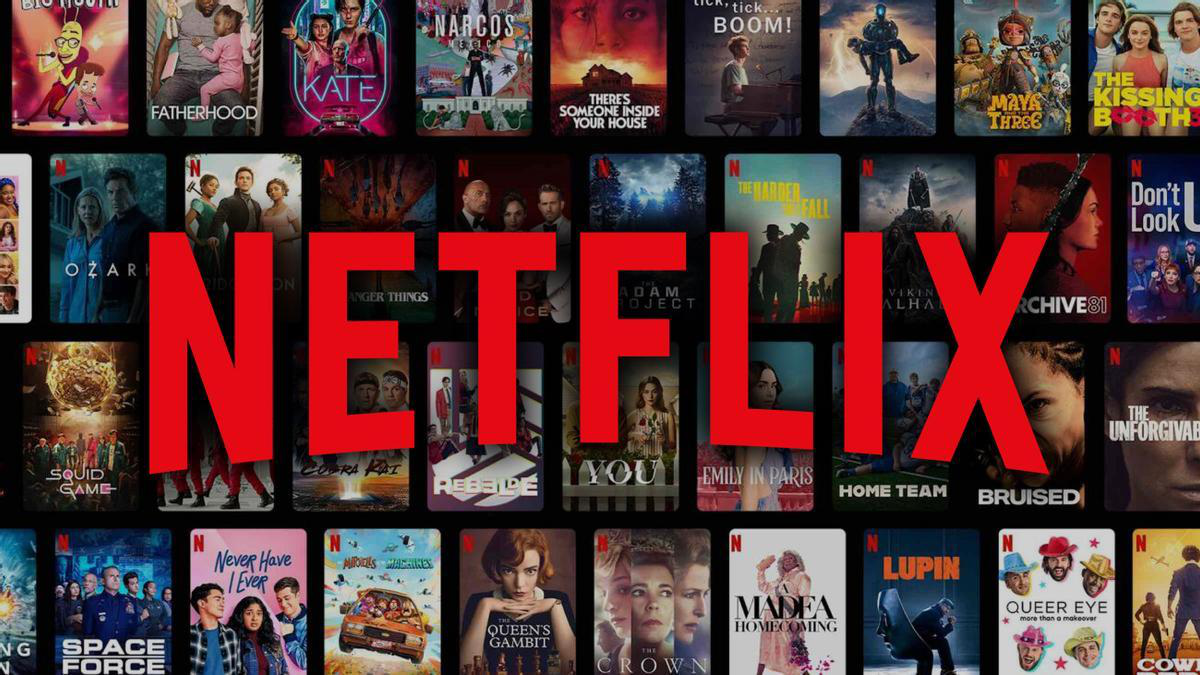

In [73]:
from PIL import Image
from IPython.display import display
import urllib.request
from io import BytesIO

url = 'https://estaticos-cdn.prensaiberica.es/clip/a77fa3b2-c422-43ad-9fcb-b4c32f1ef20f_16-9-discover-aspect-ratio_default_0.jpg'
with urllib.request.urlopen(url) as url:
    img = Image.open(BytesIO(url.read()))
display(img)

# Breakdown of Notebook
# 1.Importing Libraries
# 2.Loading the dataset
# 3.Data Exploration
# 4.Data Cleaning and Transformation
 <br>  -> Deleting redundant columns.
 <br> -> Dropping duplicates.
 <br> -> Cleaning individual columns.
 <br> -> Remove the NaN values from the dataset
 <br> -> Some Transformations
# 5.Data Visualization :
 <br> -> Type : Movie and Tv-Shows
 <br> -> Rating of Movies And Tv-Shows
 <br> -> Relation Between Type and Rating
 <br> -> Pie-chart for the Type: Movie and TV Shows
 <br> -> Top 10 Popular Genres
 <br> -> Distribution of Content by Country
 <br> -> Trends in Content Release Years
 <br>  -> Analysis Results
# 6.Word Cloud
 <br>  -> Country
 <br> -> Cast
 <br>  -> Director
 <br>  -> Category

# Importing Libraries

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Loading Dataset

In [6]:
netflix = pd.read_csv('C:/codebasics/netflix_titles.csv')
netflix

show_id     type                                        title  \
0     81145628    Movie      Norm of the North: King Sized Adventure   
1     80117401    Movie                   Jandino: Whatever it Takes   
2     70234439  TV Show                           Transformers Prime   
3     80058654  TV Show             Transformers: Robots in Disguise   
4     80125979    Movie                                 #realityhigh   
...        ...      ...                                          ...   
6229  80000063  TV Show                                 Red vs. Blue   
6230  70286564  TV Show                                        Maron   
6231  80116008    Movie       Little Baby Bum: Nursery Rhyme Friends   
6232  70281022  TV Show  A Young Doctor's Notebook and Other Stories   
6233  70153404  TV Show                                      Friends   

                      director  \
0     Richard Finn, Tim Maltby   
1                          NaN   
2                          NaN   
3                          NaN   
4             Fernando Lebrija   
...                        ...   
6229                       NaN   
6230                       NaN   
6231                       NaN   
6232                       NaN   
6233                       NaN   

                                                   cast  \
0     Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                      Jandino Asporaat   
2     Peter Cullen, Sumalee Montano, Frank Welker, J...   
3     Will Friedle, Darren Criss, Constance Zimmer, ...   
4     Nesta Cooper, Kate Walsh, John Michael Higgins...   
...                                                 ...   
6229  Burnie Burns, Jason Saldaña, Gustavo Sorola, G...   
6230  Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...   
6231                                                NaN   
6232  Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...   
6233  Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...   

                                       country         date_added  \
0     United States, India, South Korea, China  September 9, 2019   
1                               United Kingdom  September 9, 2016   
2                                United States  September 8, 2018   
3                                United States  September 8, 2018   
4                                United States  September 8, 2017   
...                                        ...                ...   
6229                             United States                NaN   
6230                             United States                NaN   
6231                                       NaN                NaN   
6232                            United Kingdom                NaN   
6233                             United States                NaN   

      release_year    rating    duration  \
0             2019     TV-PG      90 min   
1             2016     TV-MA      94 min   
2             2013  TV-Y7-FV    1 Season   
3             2016     TV-Y7    1 Season   
4             2017     TV-14      99 min   
...            ...       ...         ...   
6229          2015        NR  13 Seasons   
6230          2016     TV-MA   4 Seasons   
6231          2016       NaN      60 min   
6232          2013     TV-MA   2 Seasons   
6233          2003     TV-14  10 Seasons   

                                              listed_in  \
0                    Children & Family Movies, Comedies   
1                                       Stand-Up Comedy   
2                                              Kids' TV   
3                                              Kids' TV   
4                                              Comedies   
...                                                 ...   
6229  TV Action & Adventure, TV Comedies, TV Sci-Fi ...   
6230                                        TV Comedies   
6231                                             Movies   
6232           British TV Shows, TV Comedies, TV Dramas   
6233             

# Data Exploration

Data Description

In [7]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


First 10 Values

In [8]:
netflix.head(10)

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   
5  80163890  TV Show                                  Apaches   
6  70304989    Movie                                 Automata   
7  80164077    Movie       Fabrizio Copano: Solo pienso en mi   
8  80117902  TV Show                             Fire Chasers   
9  70304990    Movie                              Good People   

                          director  \
0         Richard Finn, Tim Maltby   
1                              NaN   
2                              NaN   
3                              NaN   
4                 Fernando Lebrija   
5                              NaN   
6                      Gabe Ibáñez   
7  Rodrigo Toro, Francisco Schultz   
8                              NaN   
9                Henrik Ruben Genz   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   
5  Alberto Ammann, Eloy Azorín, Verónica Echegui,...   
6  Antonio Banderas, Dylan McDermott, Melanie Gri...   
7                                    Fabrizio Copano   
8                                                NaN   
9  James Franco, Kate Hudson, Tom Wilkinson, Omar...   

                                          country         date_added  \
0        United States, India, South Korea, China  September 9, 2019   
1                                  United Kingdom  September 9, 2016   
2                                   United States  September 8, 2018   
3                                   United States  September 8, 2018   
4                                   United States  September 8, 2017   
5                                           Spain  September 8, 2017   
6          Bulgaria, United States, Spain, Canada  September 8, 2017   
7                                           Chile  September 8, 2017   
8                                   United States  September 8, 2017   
9  United States, United Kingdom, Denmark, Sweden  September 8, 2017   

   release_year    rating  duration  \
0          2019     TV-PG    90 min   
1          2016     TV-MA    94 min   
2          2013  TV-Y7-FV  1 Season   
3          2016     TV-Y7  1 Season   
4          2017     TV-14    99 min   
5          2016     TV-MA  1 Season   
6          2014         R   110 min   
7          2017     TV-MA    60 min   
8          2017     TV-MA  1 Season   
9          2014         R    90 min   

                                           listed_in  \
0                 Children & Family Movies, Comedies   
1                                    Stand-Up Comedy   
2                                           Kids' TV   
3                                           Kids' TV   
4                                           Comedies   
5  Crime TV Shows, International TV Shows, Spanis...   
6  International Movies, Sci-Fi & Fantasy, Thrillers   
7                                    Stand-Up Comedy   
8                    Docuseries, Science & Nature TV   
9                      Action & Adventure, Thrillers   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...  
5  A young journalist is forced into a life of cr...  
6  In a dystopian future, a

Shape of dataset

In [9]:
netflix.shape

(6234, 12)

Columns of dataset

In [10]:
netflix.columns # returns index object with columns names.
list(netflix.columns) # returns list of columns names.

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

Check null Values

In [11]:
# isnull() generates a DataFrame of True (1) and False (0) values, indicating missing values.
# sum() adds up these True values to count nulls.
netflix.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

Check Unique Values

In [12]:
# nunique() returns count of distinct values in each columns of netflix dataframe.
netflix.nunique() 

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

Check for Duplicates Values

In [13]:
# duplicated() returns a boolean Series where True indicates that the row is a duplicate.
# sum() then adds up the True values (since True is treated as 1 and False as 0), giving you the total count of duplicate rows.
netflix.duplicated().sum()

0

No Duplicates are Present

Content Duration Analysis (Movies vs TV Shows)

In [14]:
# Getting  movie duration
movie_durations = netflix[netflix['type']=='Movie']['duration']
# Extract numerical duration for movies
movie_durations = movie_durations.str.extract('(\d+)').astype(float).dropna()
# Average Movie Duration
Avg_movie_duration = movie_durations.mean()
Avg_movie_duration

0    99.100821
dtype: float64

In [15]:
# Getting  TV Show duration
tv_show_seasons = netflix[netflix['type']=='TV Show']['duration']
# Extract numerical duration for TV Sho
tv_show_seasons = tv_show_seasons.str.extract('(\d+)').astype(float).dropna()
# Average TV Show Duration
Avg_tv_show_seasons = tv_show_seasons.mean()
Avg_tv_show_seasons

0    1.779584
dtype: float64

# Data Cleaning and Manipulation

Make a copy of dataset

In [16]:
df = netflix.copy()
df

show_id     type                                        title  \
0     81145628    Movie      Norm of the North: King Sized Adventure   
1     80117401    Movie                   Jandino: Whatever it Takes   
2     70234439  TV Show                           Transformers Prime   
3     80058654  TV Show             Transformers: Robots in Disguise   
4     80125979    Movie                                 #realityhigh   
...        ...      ...                                          ...   
6229  80000063  TV Show                                 Red vs. Blue   
6230  70286564  TV Show                                        Maron   
6231  80116008    Movie       Little Baby Bum: Nursery Rhyme Friends   
6232  70281022  TV Show  A Young Doctor's Notebook and Other Stories   
6233  70153404  TV Show                                      Friends   

                      director  \
0     Richard Finn, Tim Maltby   
1                          NaN   
2                          NaN   
3                          NaN   
4             Fernando Lebrija   
...                        ...   
6229                       NaN   
6230                       NaN   
6231                       NaN   
6232                       NaN   
6233                       NaN   

                                                   cast  \
0     Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                      Jandino Asporaat   
2     Peter Cullen, Sumalee Montano, Frank Welker, J...   
3     Will Friedle, Darren Criss, Constance Zimmer, ...   
4     Nesta Cooper, Kate Walsh, John Michael Higgins...   
...                                                 ...   
6229  Burnie Burns, Jason Saldaña, Gustavo Sorola, G...   
6230  Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...   
6231                                                NaN   
6232  Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...   
6233  Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...   

                                       country         date_added  \
0     United States, India, South Korea, China  September 9, 2019   
1                               United Kingdom  September 9, 2016   
2                                United States  September 8, 2018   
3                                United States  September 8, 2018   
4                                United States  September 8, 2017   
...                                        ...                ...   
6229                             United States                NaN   
6230                             United States                NaN   
6231                                       NaN                NaN   
6232                            United Kingdom                NaN   
6233                             United States                NaN   

      release_year    rating    duration  \
0             2019     TV-PG      90 min   
1             2016     TV-MA      94 min   
2             2013  TV-Y7-FV    1 Season   
3             2016     TV-Y7    1 Season   
4             2017     TV-14      99 min   
...            ...       ...         ...   
6229          2015        NR  13 Seasons   
6230          2016     TV-MA   4 Seasons   
6231          2016       NaN      60 min   
6232          2013     TV-MA   2 Seasons   
6233          2003     TV-14  10 Seasons   

                                              listed_in  \
0                    Children & Family Movies, Comedies   
1                                       Stand-Up Comedy   
2                                              Kids' TV   
3                                              Kids' TV   
4                                              Comedies   
...                                                 ...   
6229  TV Action & Adventure, TV Comedies, TV Sci-Fi ...   
6230                                        TV Comedies   
6231                                             Movies   
6232           British TV Shows, TV Comedies, TV Dramas   
6233             

In [17]:
df.shape

(6234, 12)

Replace Null values with Not Available values

In [18]:
df["director"].fillna(value='Not Available', inplace=True)

In [19]:
df["cast"].fillna(value='Not Available', inplace=True)

In [20]:
df["country"].fillna(value='Not Available', inplace=True)

In [21]:
df["rating"].fillna(value='Not Available', inplace=True)

In [22]:
df

show_id     type                                        title  \
0     81145628    Movie      Norm of the North: King Sized Adventure   
1     80117401    Movie                   Jandino: Whatever it Takes   
2     70234439  TV Show                           Transformers Prime   
3     80058654  TV Show             Transformers: Robots in Disguise   
4     80125979    Movie                                 #realityhigh   
...        ...      ...                                          ...   
6229  80000063  TV Show                                 Red vs. Blue   
6230  70286564  TV Show                                        Maron   
6231  80116008    Movie       Little Baby Bum: Nursery Rhyme Friends   
6232  70281022  TV Show  A Young Doctor's Notebook and Other Stories   
6233  70153404  TV Show                                      Friends   

                      director  \
0     Richard Finn, Tim Maltby   
1                Not Available   
2                Not Available   
3                Not Available   
4             Fernando Lebrija   
...                        ...   
6229             Not Available   
6230             Not Available   
6231             Not Available   
6232             Not Available   
6233             Not Available   

                                                   cast  \
0     Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                      Jandino Asporaat   
2     Peter Cullen, Sumalee Montano, Frank Welker, J...   
3     Will Friedle, Darren Criss, Constance Zimmer, ...   
4     Nesta Cooper, Kate Walsh, John Michael Higgins...   
...                                                 ...   
6229  Burnie Burns, Jason Saldaña, Gustavo Sorola, G...   
6230  Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...   
6231                                      Not Available   
6232  Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...   
6233  Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...   

                                       country         date_added  \
0     United States, India, South Korea, China  September 9, 2019   
1                               United Kingdom  September 9, 2016   
2                                United States  September 8, 2018   
3                                United States  September 8, 2018   
4                                United States  September 8, 2017   
...                                        ...                ...   
6229                             United States                NaN   
6230                             United States                NaN   
6231                             Not Available                NaN   
6232                            United Kingdom                NaN   
6233                             United States                NaN   

      release_year         rating    duration  \
0             2019          TV-PG      90 min   
1             2016          TV-MA      94 min   
2             2013       TV-Y7-FV    1 Season   
3             2016          TV-Y7    1 Season   
4             2017          TV-14      99 min   
...            ...            ...         ...   
6229          2015             NR  13 Seasons   
6230          2016          TV-MA   4 Seasons   
6231          2016  Not Available      60 min   
6232          2013          TV-MA   2 Seasons   
6233          2003          TV-14  10 Seasons   

                                              listed_in  \
0                    Children & Family Movies, Comedies   
1                                       Stand-Up Comedy   
2                                              Kids' TV   
3                                              Kids' TV   
4                                              Comedies   
...                                                 ...   
6229  TV Action & Adventure, TV Comedies, TV Sci-Fi ...   
6230                                        TV Comedies   
6231                                             Movies   
6232           B

In [23]:
df.shape

(6234, 12)

Drop Null Values

In [47]:
df.dropna(subset=['date_added'], inplace=True)

Check Null values

In [48]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
Year            0
Month           0
Day             0
dtype: int64

In [49]:
df.shape

(5583, 15)

In [50]:
df.head(10)

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   
5  80163890  TV Show                                  Apaches   
6  70304989    Movie                                 Automata   
7  80164077    Movie       Fabrizio Copano: Solo pienso en mi   
8  80117902  TV Show                             Fire Chasers   
9  70304990    Movie                              Good People   

                          director  \
0         Richard Finn, Tim Maltby   
1                    Not Available   
2                    Not Available   
3                    Not Available   
4                 Fernando Lebrija   
5                    Not Available   
6                      Gabe Ibáñez   
7  Rodrigo Toro, Francisco Schultz   
8                    Not Available   
9                Henrik Ruben Genz   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   
5  Alberto Ammann, Eloy Azorín, Verónica Echegui,...   
6  Antonio Banderas, Dylan McDermott, Melanie Gri...   
7                                    Fabrizio Copano   
8                                      Not Available   
9  James Franco, Kate Hudson, Tom Wilkinson, Omar...   

                                          country date_added  release_year  \
0        United States, India, South Korea, China 2019-09-09          2019   
1                                  United Kingdom 2016-09-09          2016   
2                                   United States 2018-09-08          2013   
3                                   United States 2018-09-08          2016   
4                                   United States 2017-09-08          2017   
5                                           Spain 2017-09-08          2016   
6          Bulgaria, United States, Spain, Canada 2017-09-08          2014   
7                                           Chile 2017-09-08          2017   
8                                   United States 2017-09-08          2017   
9  United States, United Kingdom, Denmark, Sweden 2017-09-08          2014   

     rating  duration                                          listed_in  \
0     TV-PG    90 min                 Children & Family Movies, Comedies   
1     TV-MA    94 min                                    Stand-Up Comedy   
2  TV-Y7-FV  1 Season                                           Kids' TV   
3     TV-Y7  1 Season                                           Kids' TV   
4     TV-14    99 min                                           Comedies   
5     TV-MA  1 Season  Crime TV Shows, International TV Shows, Spanis...   
6         R   110 min  International Movies, Sci-Fi & Fantasy, Thrillers   
7     TV-MA    60 min                                    Stand-Up Comedy   
8     TV-MA  1 Season                    Docuseries, Science & Nature TV   
9         R    90 min                      Action & Adventure, Thrillers   

                                         description    Year  Month  Day  
0  Before planning an awesome wedding for his gra...  2019.0    9.0  9.0  
1  Jandino Asporaat riffs on the challenges of ra...  2016.0    9.0  9.0  
2  With the help of three human allies, the Autob...  2018.0    9.0  8.0  
3  When a prison ship crash unleashes hundreds of...  2018.0    9.0  8.0  
4  When nerdy high schooler Dani finally attracts...  2017.0    9.0  8.0  
5  A young journalist is forced into a life of cr...  2017.0    9.0  8.0  
6  In a dystopian future, an in

Convert Date Time Format

In [51]:
pd.set_option("mode.copy_on_write", True)
pd.options.mode.copy_on_write = True

In [52]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_added'].dtype
df['Year'] = df['date_added'].dt.year
df['Month'] = df['date_added'].dt.month
df['Day'] = df['date_added'].dt.day
df['date_added'].dtype

dtype('<M8[ns]')

In [53]:
df

show_id     type                                      title  \
0     81145628    Movie    Norm of the North: King Sized Adventure   
1     80117401    Movie                 Jandino: Whatever it Takes   
2     70234439  TV Show                         Transformers Prime   
3     80058654  TV Show           Transformers: Robots in Disguise   
4     80125979    Movie                               #realityhigh   
...        ...      ...                                        ...   
5578  80085439    Movie                            Frank and Cindy   
5579  80011846    Movie                                    Iverson   
5580  80064521    Movie        Jeremy Scott: The People's Designer   
5581  80106136  TV Show                               Yo-Kai Watch   
5582  70259784  TV Show  DreamWorks Happy Holidays from Madagascar   

                      director  \
0     Richard Finn, Tim Maltby   
1                Not Available   
2                Not Available   
3                Not Available   
4             Fernando Lebrija   
...                        ...   
5578          G.J. Echternkamp   
5579            Zatella Beatty   
5580                Vlad Yudin   
5581             Not Available   
5582             Not Available   

                                                   cast  \
0     Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                      Jandino Asporaat   
2     Peter Cullen, Sumalee Montano, Frank Welker, J...   
3     Will Friedle, Darren Criss, Constance Zimmer, ...   
4     Nesta Cooper, Kate Walsh, John Michael Higgins...   
...                                                 ...   
5578  Rene Russo, Oliver Platt, Johnny Simmons, Jane...   
5579                                      Allen Iverson   
5580                                       Jeremy Scott   
5581  Johnny Yong Bosch, J.W. Terry, Alicyn Packard,...   
5582  Tom McGrath, Chris Miller, Christopher Knights...   

                                       country date_added  release_year  \
0     United States, India, South Korea, China 2019-09-09          2019   
1                               United Kingdom 2016-09-09          2016   
2                                United States 2018-09-08          2013   
3                                United States 2018-09-08          2016   
4                                United States 2017-09-08          2017   
...                                        ...        ...           ...   
5578                             United States 2016-04-01          2015   
5579                             United States 2016-04-01          2014   
5580                             United States 2016-04-01          2015   
5581                             United States 2016-04-01          2015   
5582                             United States 2013-04-01          2005   

        rating  duration                             listed_in  \
0        TV-PG    90 min    Children & Family Movies, Comedies   
1        TV-MA    94 min                       Stand-Up Comedy   
2     TV-Y7-FV  1 Season                              Kids' TV   
3        TV-Y7  1 Season                              Kids' TV   
4        TV-14    99 min                              Comedies   
...        ...       ...                                   ...   
5578         R   102 min  Comedies, Dramas, Independent Movies   
5579        NR    88 min          Documentaries, Sports Movies   
5580     PG-13   109 min                         Documentaries   
5581     TV-Y7  1 Season                Anime Series, Kids' TV   
5582     TV-PG  1 Season                 Kids' TV, TV Comedies   

                                            description  Year  Month  Day  
0     Before planning an awesome wedding for his gra...  2019      9    9  
1     Jandino Asporaat riffs on the challenges of ra...  2016      9    9  
2     With the help of three human allies, the Autob...  2018      9    8  
3     When a prison ship crash unleashes hundreds 

# Data Visualization



Type : Movie and Tv-Shows

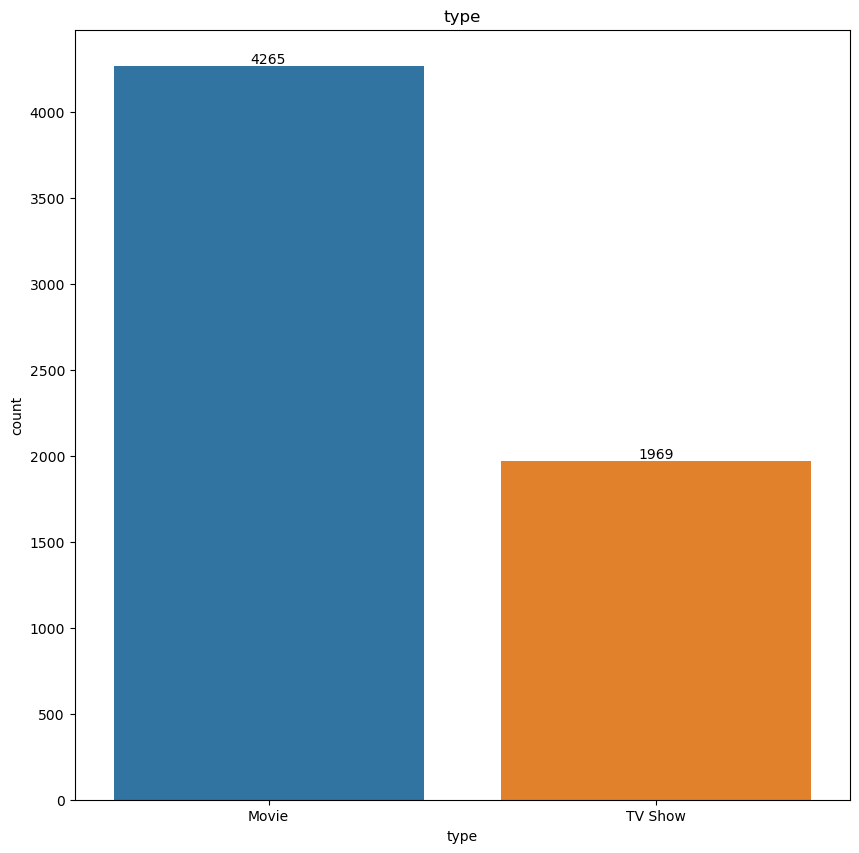

In [54]:
ax = sns.countplot(data=netflix,x='type')
ax.bar_label(ax.containers[0])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('type')
plt.show()

Rating of Movies And Tv-Shows

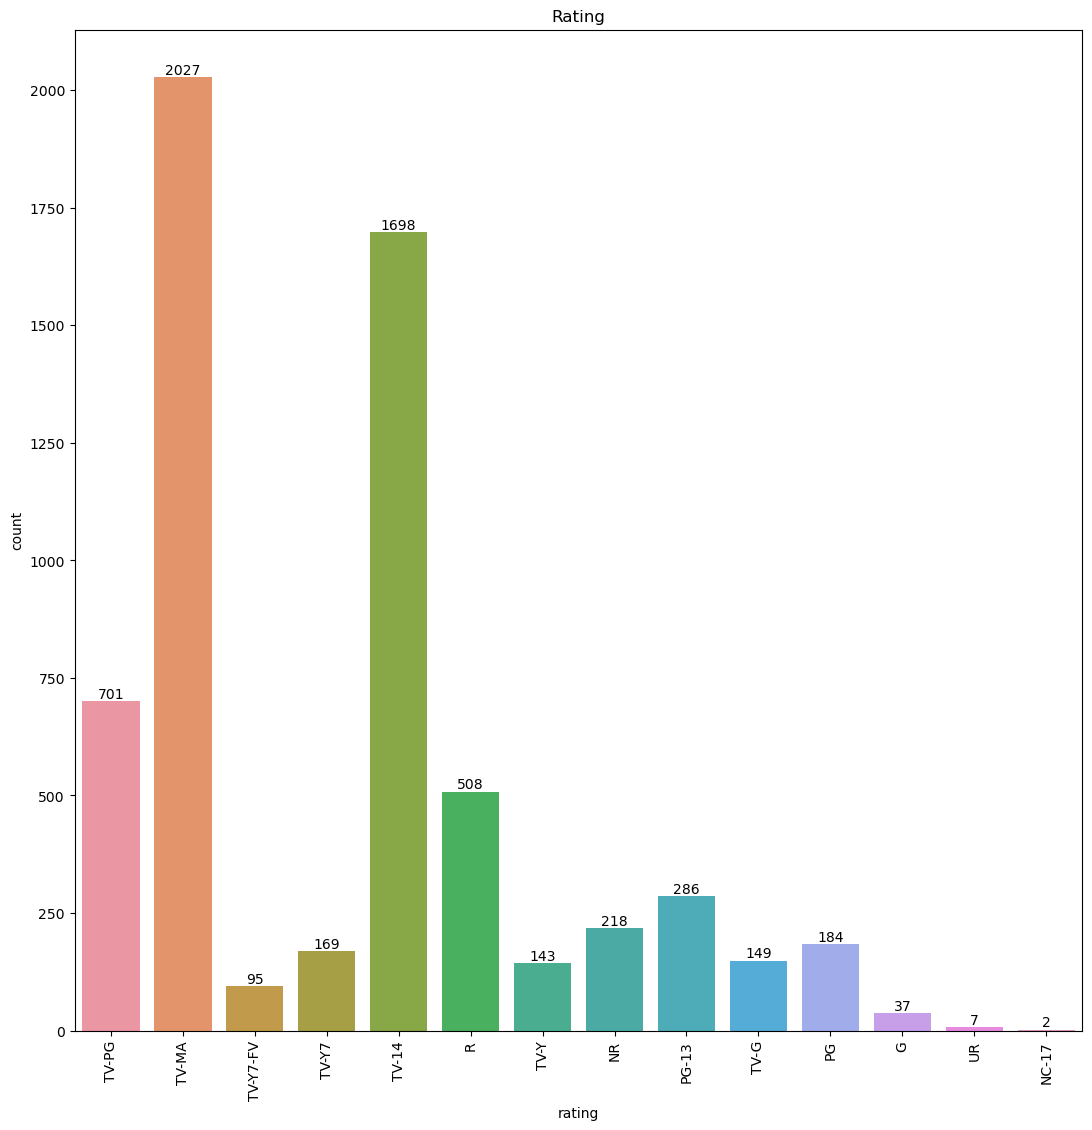

In [55]:
ax=sns.countplot(data = netflix,x='rating')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title("Rating")
fig=plt.gcf()
fig.set_size_inches(13,13)
plt.show()


Relation Between Type and Rating

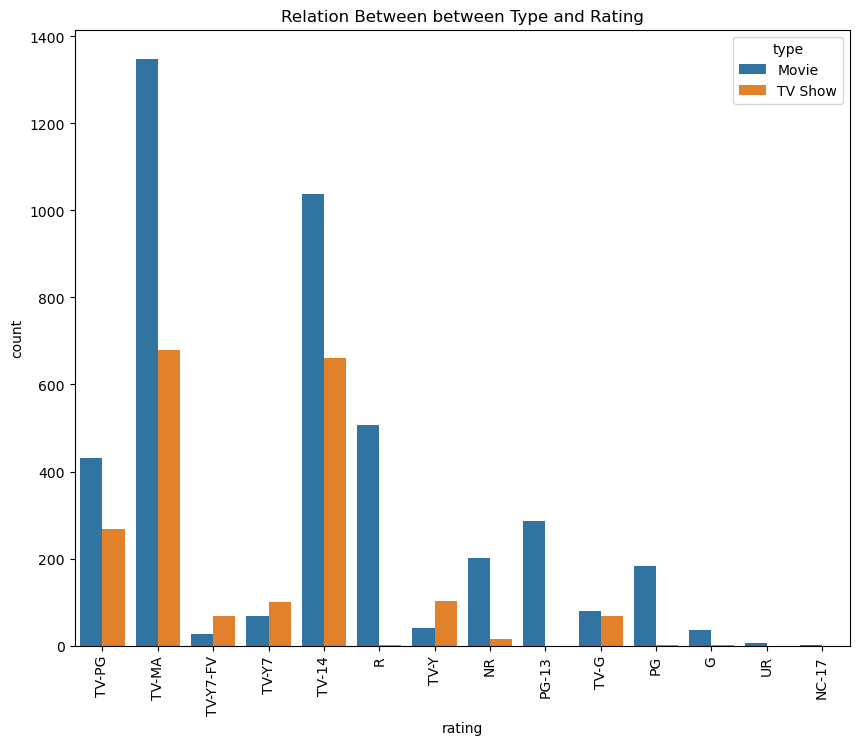

In [56]:
sns.countplot(data = netflix,x='rating',hue = "type")
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.title("Relation Between between Type and Rating")
plt.show()

Pie-chart for the Type: Movie and TV Shows

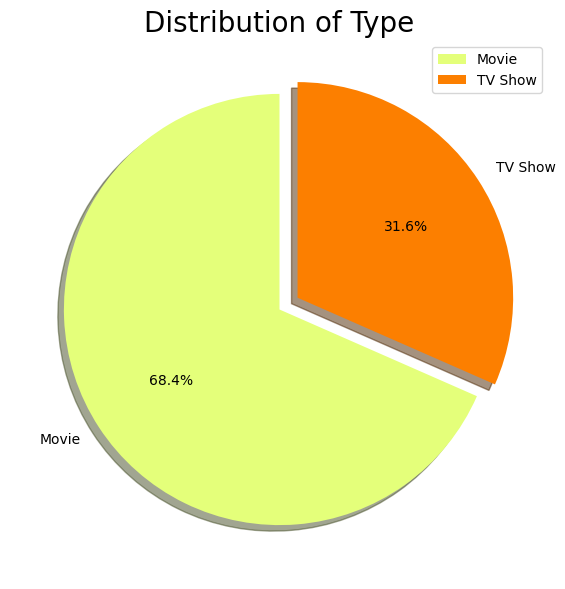

In [57]:
labels = ["Movie",'TV Show']
Size = netflix['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0,1,2))
explode = [0,0.1]
plt.pie(Size,labels=labels,colors=colors,explode=explode,shadow=True,startangle = 90, autopct ='%1.1f%%')
plt.rcParams['figure.figsize'] = (7,7)
plt.title('Distribution of Type', fontsize = 20)
plt.legend()
plt.show()

Top 10 Popular Genres

In [58]:
genre_counts = netflix['listed_in'].str.split(', ').explode().value_counts()
Top_popular_genres = genre_counts.head(10)
Top_popular_genres

listed_in
International Movies      1927
Dramas                    1623
Comedies                  1113
International TV Shows    1001
Documentaries              668
TV Dramas                  599
Action & Adventure         597
Independent Movies         552
TV Comedies                436
Thrillers                  392
Name: count, dtype: int64

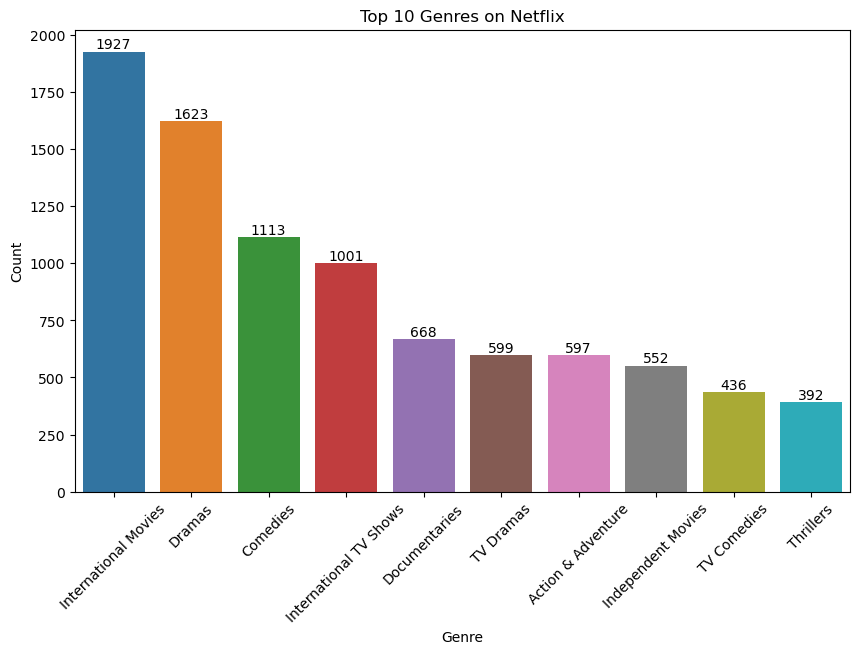

In [59]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=Top_popular_genres.index, y=Top_popular_genres.values)
ax.bar_label(ax.containers[0])
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Distribution of Content by Country

In [36]:
Distribution_country_wise = netflix['country'].str.split(', ').explode().value_counts().head(10)

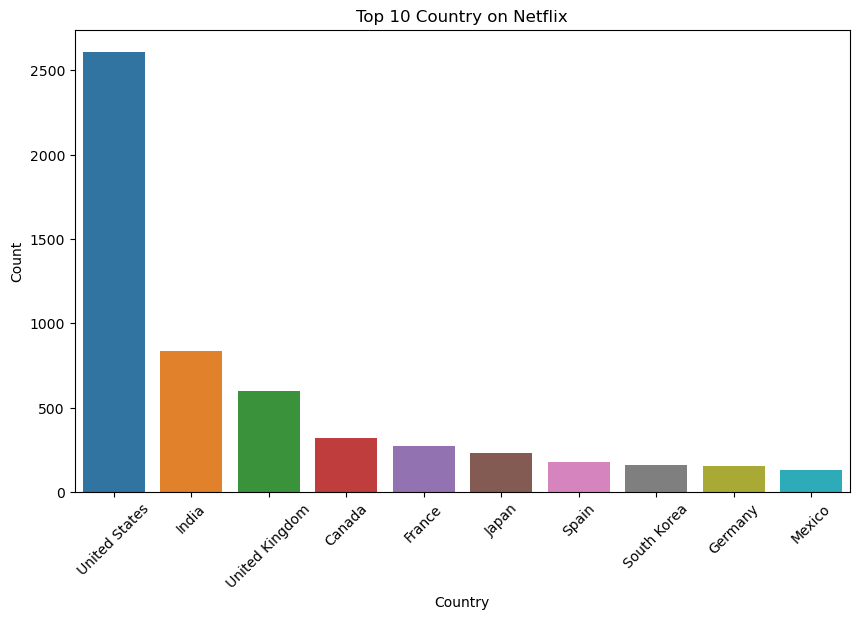

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(x=Distribution_country_wise.index,y=Distribution_country_wise.values)
plt.title('Top 10 Country on Netflix')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Trends in Content Release Years

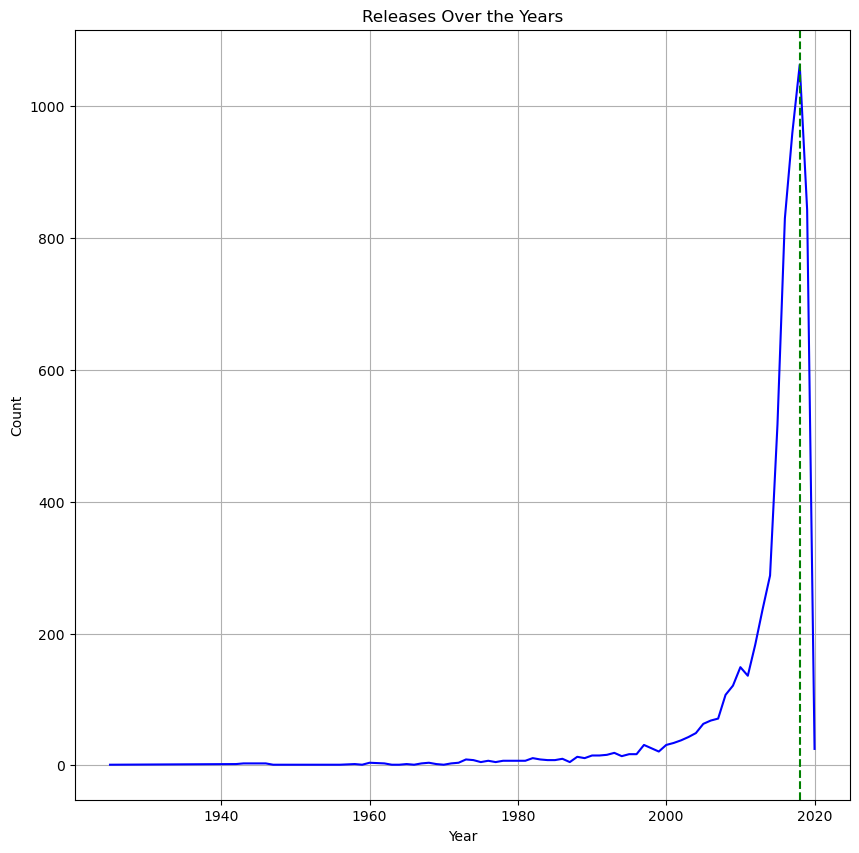

In [64]:
release_years = netflix['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,10))
release_years.plot(kind='line', color='blue', title="Releases Over the Years")
plt.ylabel("Count")
plt.xlabel("Year")
plt.axvline(x=2018, color='green', linestyle='--')
plt.grid()
plt.show()

In [65]:
analysis_results = {
    "Content Type Distribution": netflix['type'].value_counts().to_dict(),
    "Top Genres": Top_popular_genres.to_dict(),
    "Top Countries": Distribution_country_wise.to_dict(),
    "Release Year Trends": release_years ,
    "Average Movie Duration (min)": Avg_movie_duration,
    "Average TV Show Seasons": Avg_tv_show_seasons,
    "Rating Distribution": netflix['rating'].value_counts().to_dict()
}

In [66]:
analysis_results

{'Content Type Distribution': {'Movie': 4265, 'TV Show': 1969},
 'Top Genres': {'International Movies': 1927,
  'Dramas': 1623,
  'Comedies': 1113,
  'International TV Shows': 1001,
  'Documentaries': 668,
  'TV Dramas': 599,
  'Action & Adventure': 597,
  'Independent Movies': 552,
  'TV Comedies': 436,
  'Thrillers': 392},
 'Top Countries': {'United States': 2609,
  'India': 838,
  'United Kingdom': 601,
  'Canada': 318,
  'France': 271,
  'Japan': 231,
  'Spain': 178,
  'South Korea': 162,
  'Germany': 151,
  'Mexico': 129},
 'Release Year Trends': release_year
 1925       1
 1942       2
 1943       3
 1944       3
 1945       3
         ... 
 2016     830
 2017     959
 2018    1063
 2019     843
 2020      25
 Name: count, Length: 72, dtype: int64,
 'Average Movie Duration (min)': 0    99.100821
 dtype: float64,
 'Average TV Show Seasons': 0    1.779584
 dtype: float64,
 'Rating Distribution': {'TV-MA': 2027,
  'TV-14': 1698,
  'TV-PG': 701,
  'R': 508,
  'PG-13': 286,
  'NR': 21

# Word Cloud



In [67]:
from wordcloud import WordCloud

Country

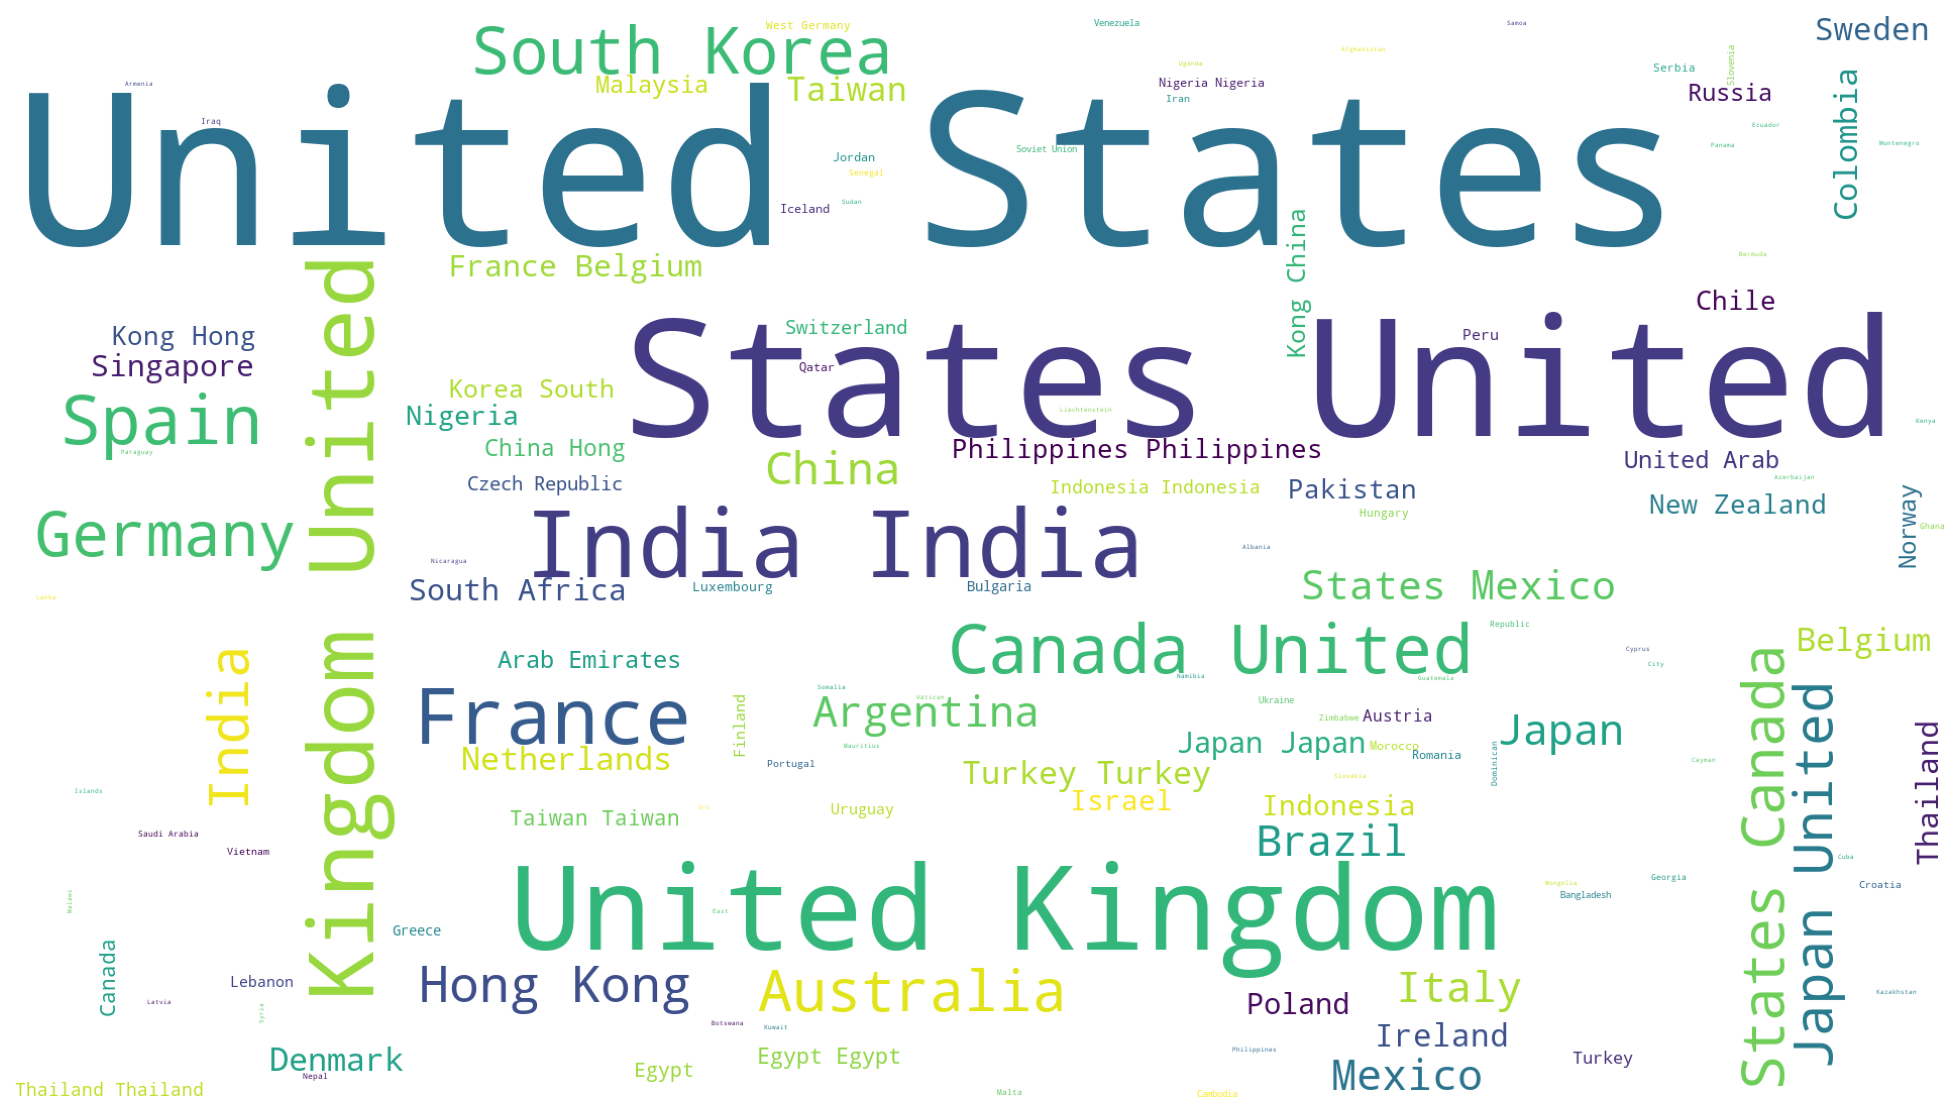

In [68]:
plt.subplots(figsize=(25,15))
# Assuming netflix.country might have missing values or non-string values
netflix['country'] = netflix['country'].fillna('').astype(str)
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(",".join(netflix.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

Cast in the Movies/Shows

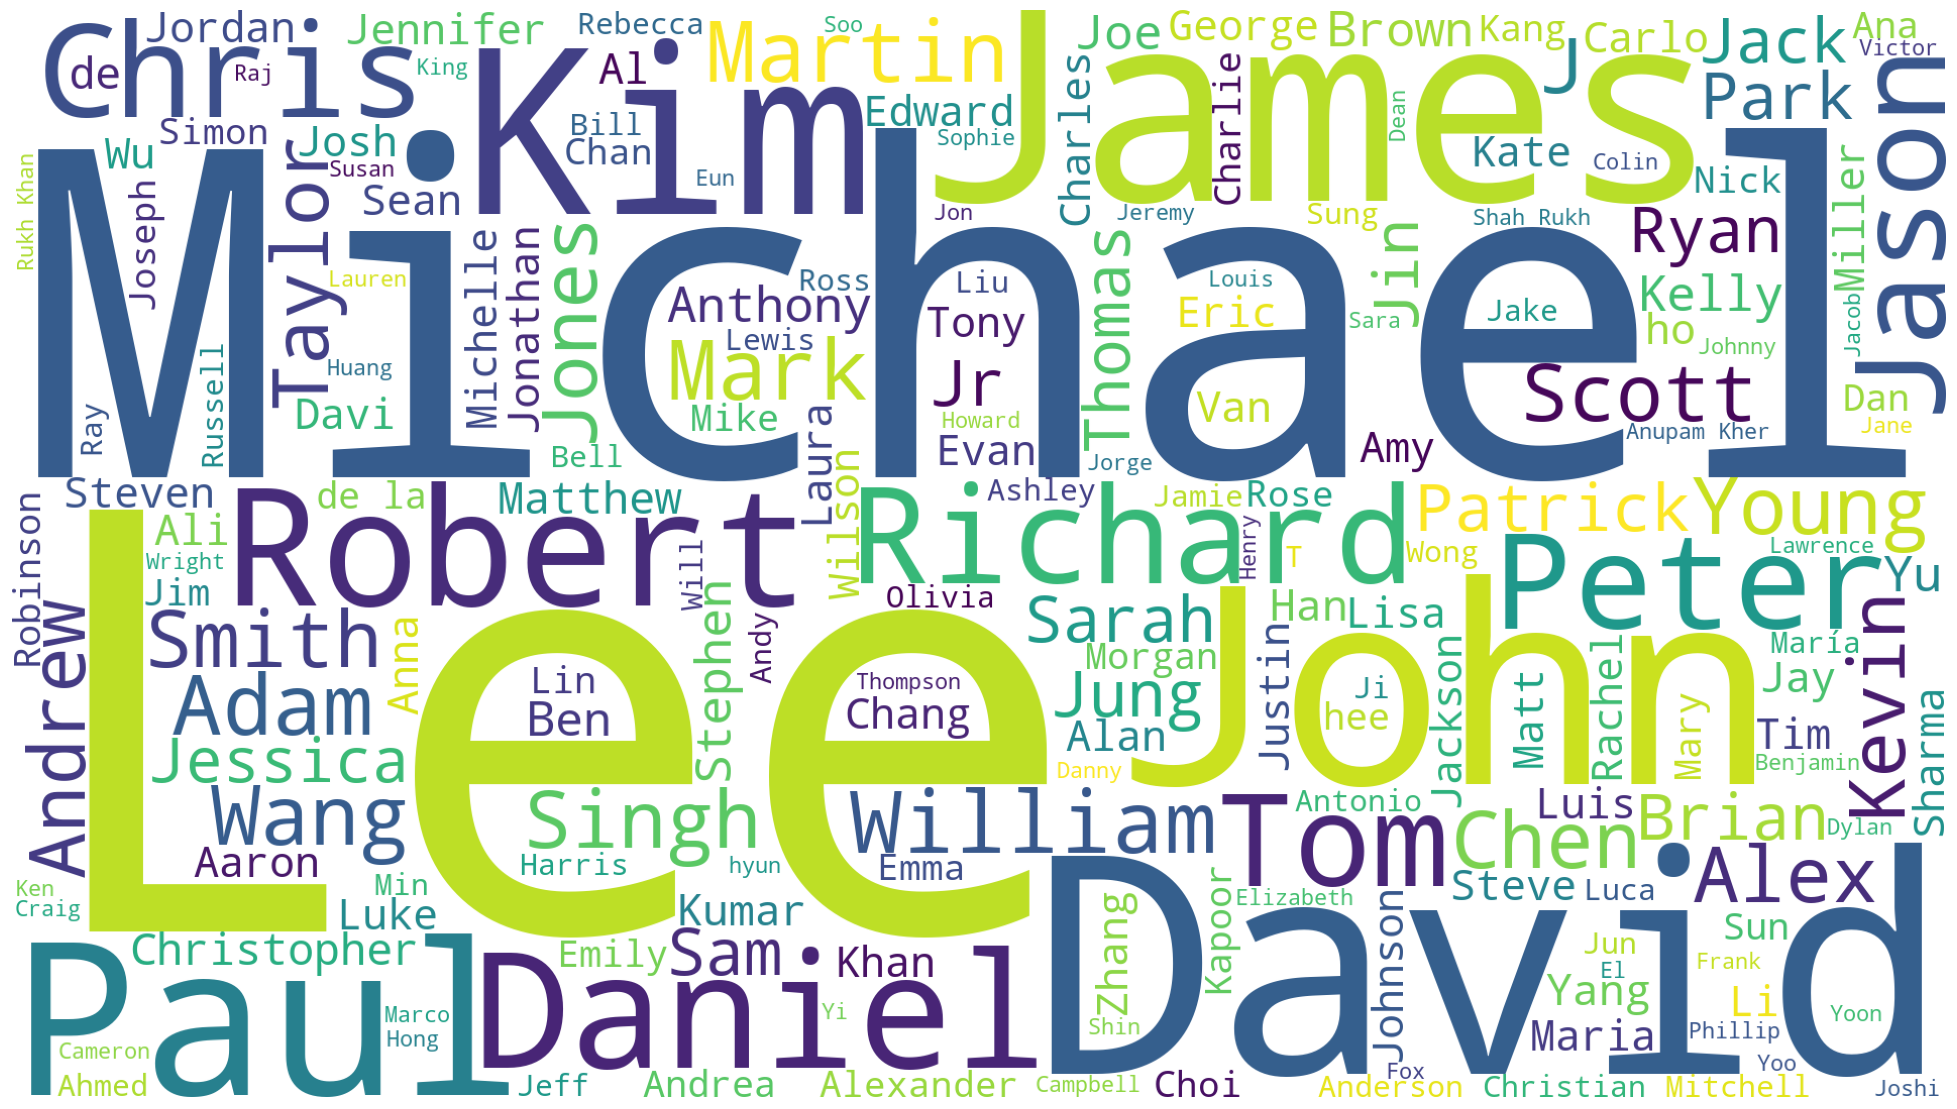

In [69]:
plt.subplots(figsize=(25,15))
# Assuming netflix.cast might have missing values or non-string values
netflix['cast'] = netflix['cast'].fillna('').astype(str)
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(",".join(netflix.cast))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

Directors

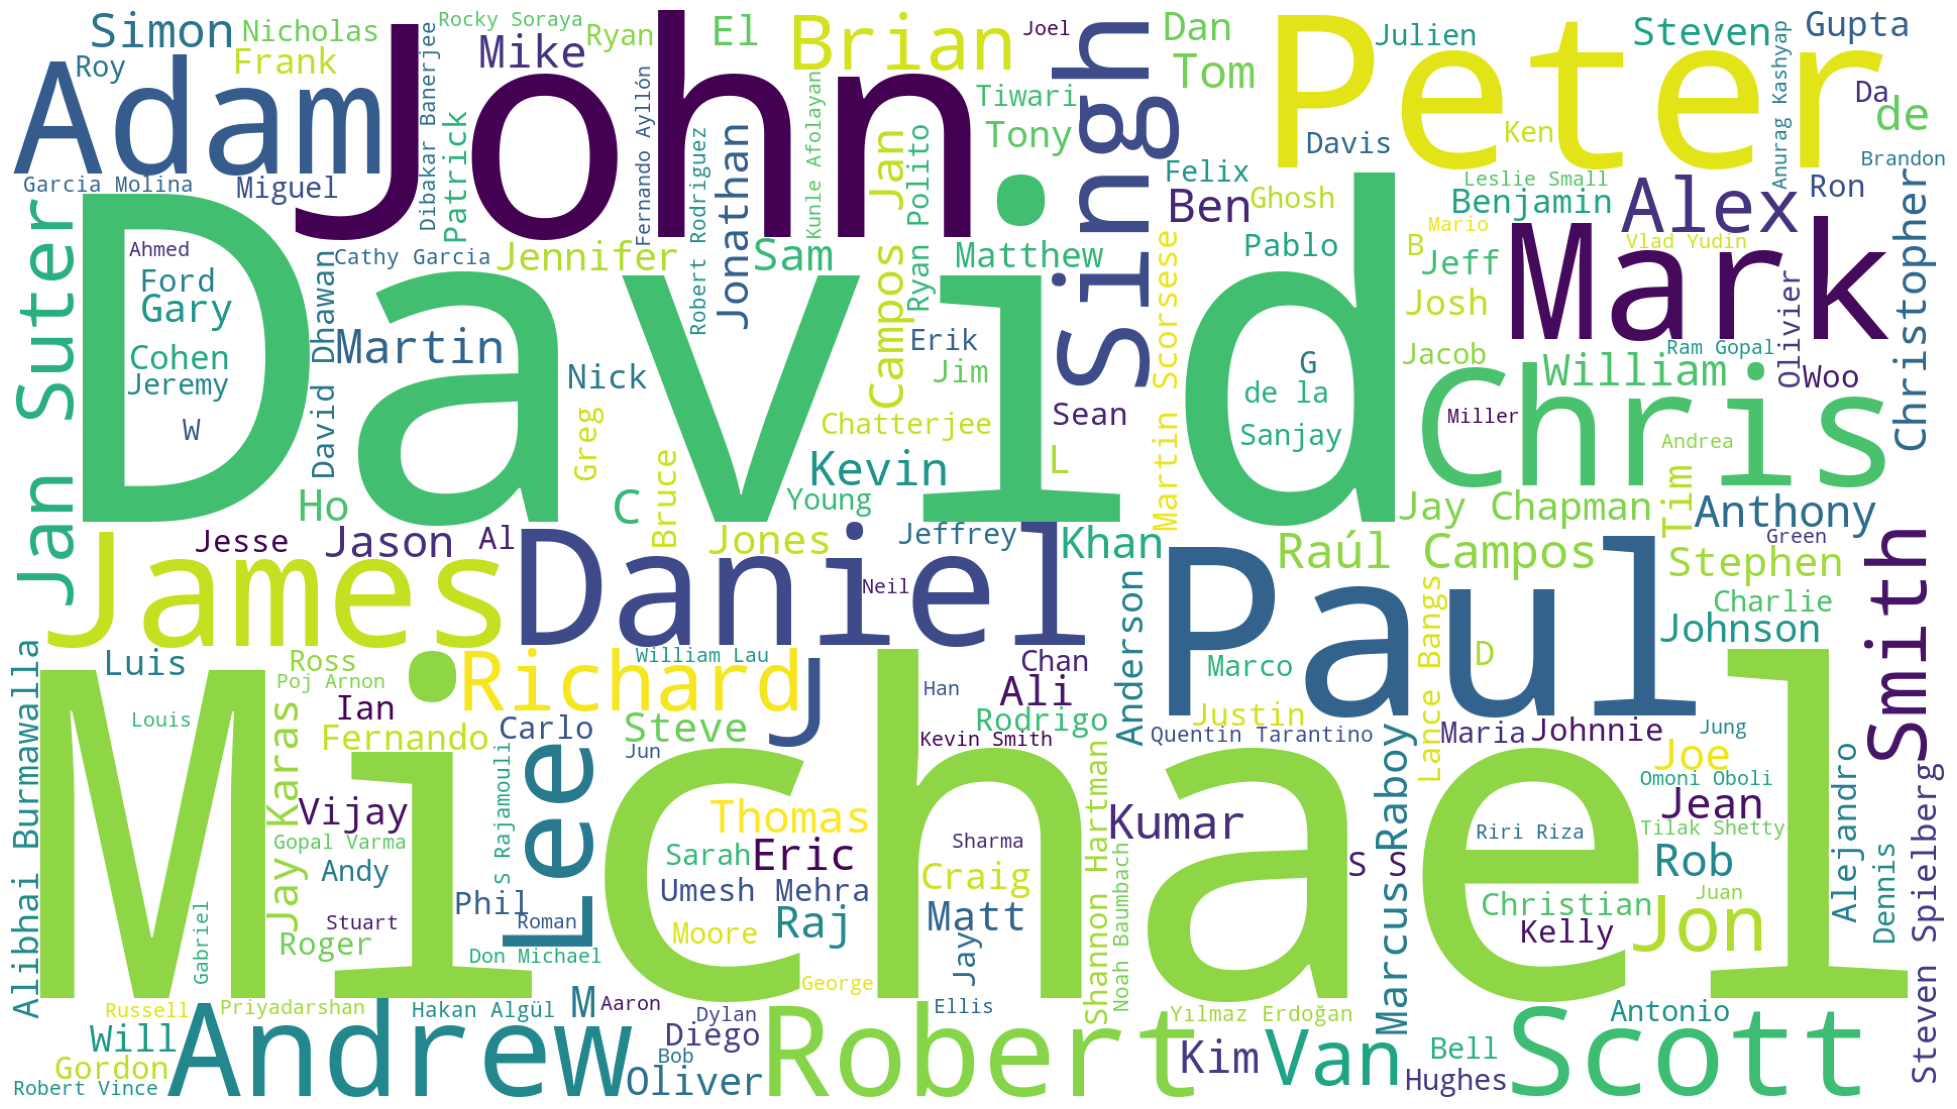

In [70]:
plt.subplots(figsize=(25,15))
# Assuming netflix.director might have missing values or non-string values
netflix['director'] = netflix['director'].fillna('').astype(str)
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(",".join(netflix.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()

Categories

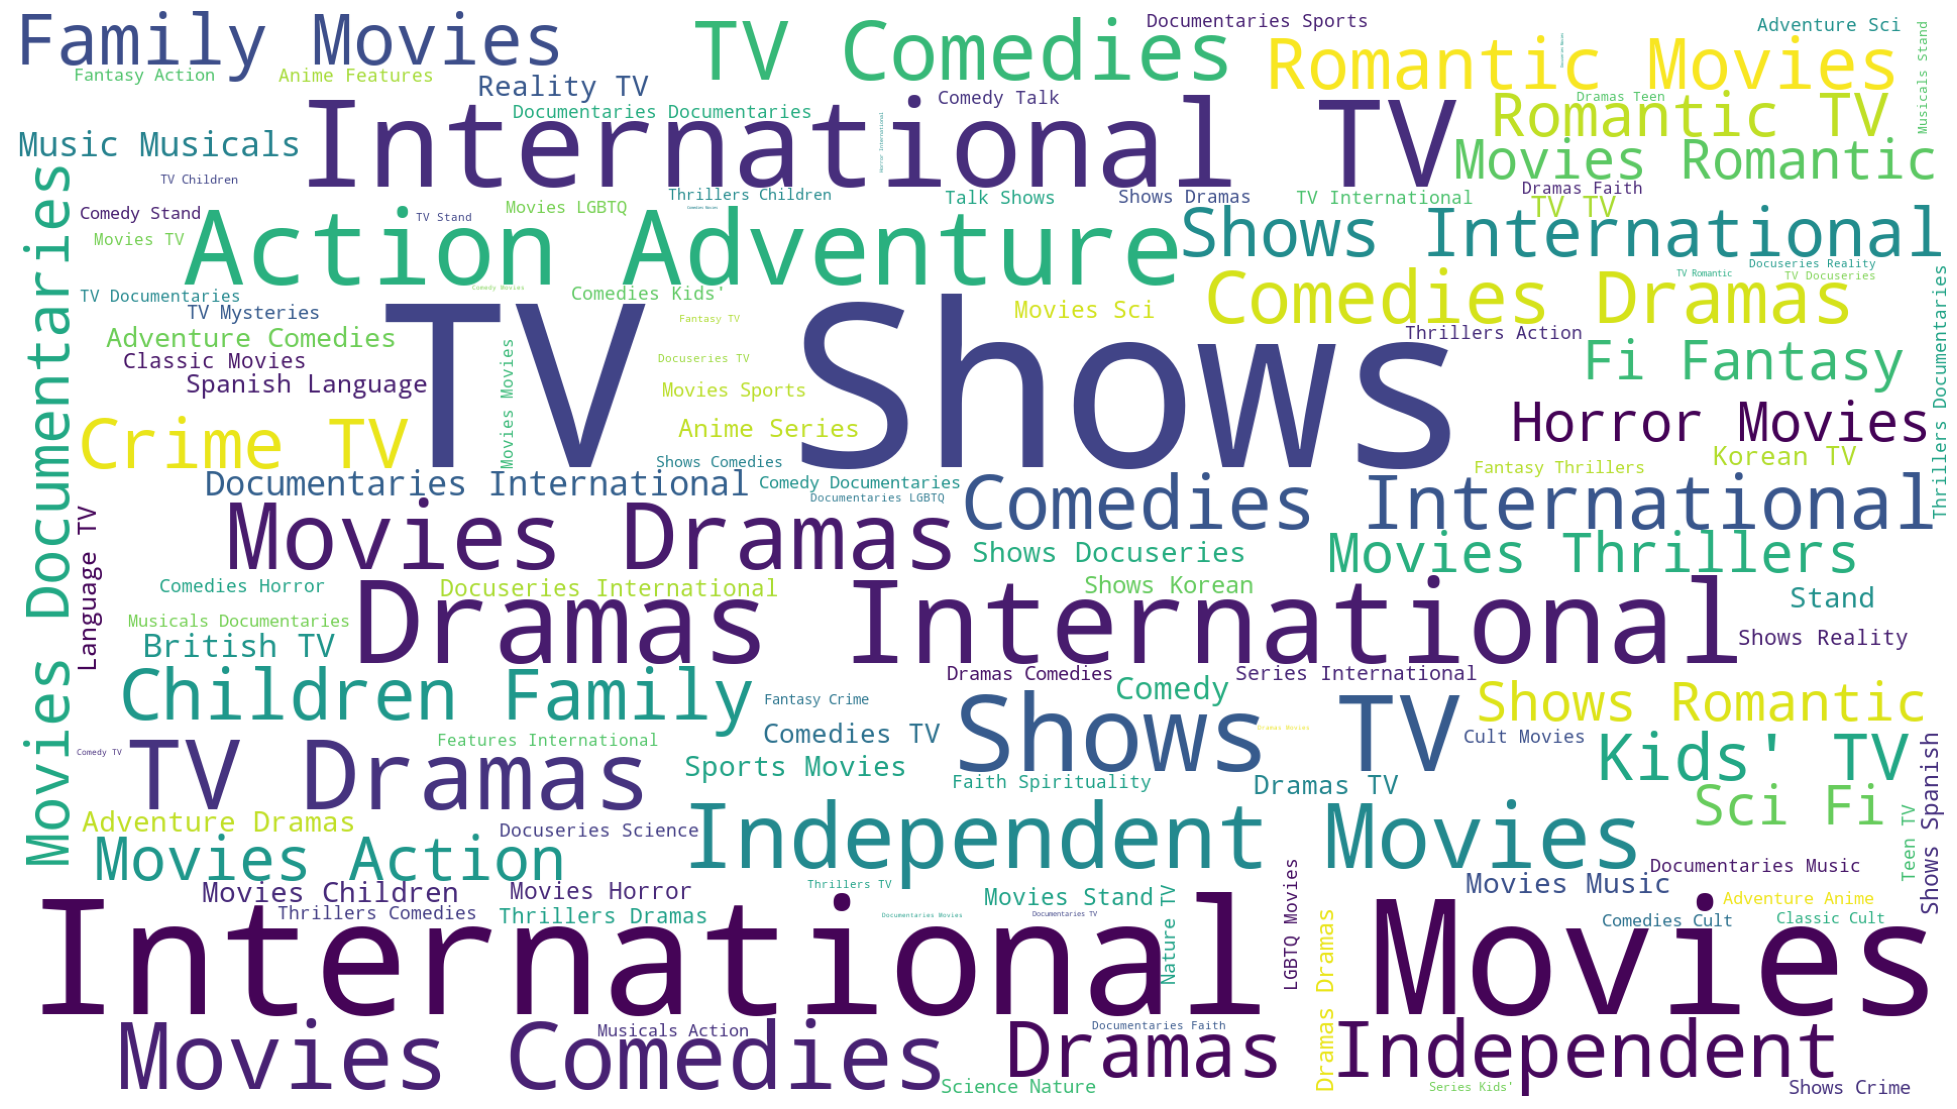

In [71]:
plt.subplots(figsize=(25,15))
# Assuming netflix.listed_in might have missing values or non-string values
netflix['listed_in'] = netflix['listed_in'].fillna('').astype(str)
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(netflix.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()

# END OF NOTEBOOK